In [1]:
import itertools

# Our numerical workhorses
import numpy as np
import pandas as pd
import scipy.integrate

# Import Altair for high level plotting
import altair as alt

# Import Bokeh modules for interactive plotting
import bokeh.io
import bokeh.plotting

# Set up Bokeh for inline viewing
bokeh.io.output_notebook()

Loading BokehJS ...

a)The columns x_coord and y_coord give the coordinates of the ant's body parts in units of pixels. Create a column 'x (mm)' and a column 'y (mm)' in the data frame that has the coordinates in units of millimeters.

In [2]:
# Use pd.read_csv() to read in the data and store in a DataFrame
df = pd.read_csv('../data/ant_joint_locations.zip', comment='#')

In [3]:
# Check the data frame
df.head()

,frame,beetle_treatment,ID,bodypart,x_coord,y_coord,likelihood
0,0,dalotia,0,head,73.086,193.835,1.0
1,1,dalotia,0,head,73.730,194.385,1.0
2,2,dalotia,0,head,75.673,195.182,1.0
3,3,dalotia,0,head,77.319,196.582,1.0
4,4,dalotia,0,head,78.128,197.891,1.0


In [4]:
# Make new columns converting pixels to mm.
df['x (mm)'] = df['x_coord'] * .08
df['y (mm)'] = df['y_coord'] * .08

# Check if it worked
df.head()

,frame,beetle_treatment,ID,bodypart,x_coord,y_coord,likelihood,x (mm),y (mm)
0,0,dalotia,0,head,73.086,193.835,1.0,5.84688,15.50680
1,1,dalotia,0,head,73.730,194.385,1.0,5.89840,15.55080
2,2,dalotia,0,head,75.673,195.182,1.0,6.05384,15.61456
3,3,dalotia,0,head,77.319,196.582,1.0,6.18552,15.72656
4,4,dalotia,0,head,78.128,197.891,1.0,6.25024,15.83128


In [5]:
# Make new columns converting frames to time.
df['time'] = df['frame'] / 28

# Check if it worked
df.head()

,frame,beetle_treatment,ID,bodypart,x_coord,y_coord,likelihood,x (mm),y (mm),time
0,0,dalotia,0,head,73.086,193.835,1.0,5.84688,15.50680,0.000000
1,1,dalotia,0,head,73.730,194.385,1.0,5.89840,15.55080,0.035714
2,2,dalotia,0,head,75.673,195.182,1.0,6.05384,15.61456,0.071429
3,3,dalotia,0,head,77.319,196.582,1.0,6.18552,15.72656,0.107143
4,4,dalotia,0,head,78.128,197.891,1.0,6.25024,15.83128,0.142857


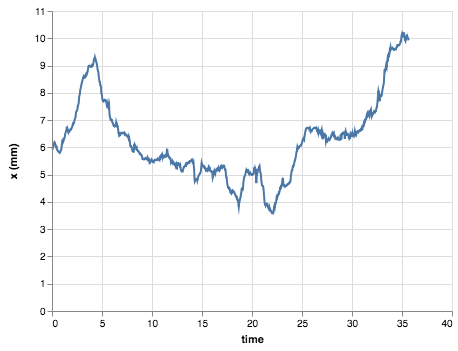

In [6]:
df2 = df[df['bodypart'] == 'thorax']

df_dalotia = df2[df2['beetle_treatment'] == 'dalotia']
df_sceptobius = df2[df2['beetle_treatment'] == 'sceptobius']

df_dalotia.head(100)
alt.Chart(df_dalotia.head(1000)).mark_line().encode(
    x='time',
    y='x (mm)'
)